## Urban-Heat-Island-Effekt Quantifizierung mittels Zeitreihenanalyse, Freiburg

> author: Nadiya Lukyanchenko
> 
> area: Freiburg und Emmendingen
> 
> date: 26.08.2024

### Einleitung
Im Zuge des globalen Klimawandels und der zunehmenden Urbanisierung rücken die Untersuchung und das Verständnis mikroklimatischer Unterschiede zwischen urbanen und ländlichen Räumen in den Fokus der Klimaforschung. Städte weisen häufig höhere Temperaturen auf als das umliegende ländliche Gebiet, ein Phänomen, das als „städtische Wärmeinsel“ (Urban Heat Island) bezeichnet wird. Dieses Phänomen kann nicht nur das Wohlbefinden der Stadtbewohner beeinflussen, sondern auch ihre Gesundheit. (1)

Ziel dieser Untersuchung ist es, den Unterschied in den Sommertemperaturen zwischen Freiburg (stellvertretend für einen urbanen Raum) und Emmendingen (stellvertretend für einen ruralen Raum) zu analysieren. Wir haben die zwei Orte aufgrund ihrer Nähe zueinander und ihrer sich stark unterscheidenden Bevölkerungsdichte ausgewählt: Emmendingen hat aktuell ca. 1950 Einwohner (2) und Freiburg ca. 237250 (3). Freiburg hat dementsprechend einen höheren Versieglungsgrad und eine höhere Gebäudedichte als Emmendingen, was sich stark auf die nächtliche Abkühlung auswirkt. (1)
Darum wollen wir besonders untersuchen, ob Freiburg im Sommer tendenziell höhere Temperaturen aufweist als Emmendingen und ob dieser Unterschied nachts deutlicher ist als tagsüber. Diese Fragestellung ist relevant, um die Auswirkungen der Urbanisierung auf das lokale Klima besser zu verstehen und um mögliche Anpassungsstrategien zur Minderung von Hitzebelastungen in städtischen Gebieten entwickeln zu können.

Für die Analyse wurden Klimadaten des Deutschen Wetterdienstes (DWD) herangezogen, die stündliche Temperaturmessungen für die letzten 20 Jahre (2003–2023) umfassen. Der Sommer wurde gemäß der meteorologischen Definition des DWD auf den Zeitraum vom 1. Juni bis zum 31. August beschränkt (4). Um eine fundierte statistische Analyse durchzuführen, wurden Tages- und Nachtmittelwerte für jeden Sommer ermittelt und anschließend statistisch ausgewertet, um signifikante Unterschiede zwischen den beiden Untersuchungsgebieten zu identifizieren. Besondere Aufmerksamkeit gilt dabei der Frage, ob die Temperaturdifferenz zwischen urbanem und ruralem Raum nachts stärker ausgeprägt ist als tagsüber, was auf eine verstärkte Wärmeakkumulation in der städtischen Umgebung hinweisen könnte.

### Preprocessing
Das Preprocessing stellt einen entscheidenden ersten Schritt in der Datenanalyse dar, bei dem die Rohdaten für die nachfolgenden Analyseprozesse vorbereitet werden. In diesem Fall wurden stündliche Klimadaten für die Städte Emmendingen und Freiburg eingelesen und anschließend auf ihre grundlegende Struktur überprüft. Das Ziel dieser Schritte ist es, die Daten auf ihre Korrektheit und Vollständigkeit zu überprüfen und ein erstes Verständnis für die Daten zu entwickeln. Diese Überprüfung bildet die Grundlage für weiterführende Schritte, wie die Datenbereinigung, Aggregation und Analyse, die in den nächsten Phasen der Untersuchung folgen.

In [1]:
# Einlesen der Daten 
import pandas as pd

# stündliche Klimadaten Emmendingen 
Em = pd.read_csv('C:\\Users\\nadiy\\Downloads\\Abgabe\\Stundenwerte_Emmendingen\\Stundenwerte_Emmendingen.txt', sep=';')

#stündliche Klimadaten Freiburg
Fr = pd.read_csv('C:\\Users\\nadiy\\Downloads\\Abgabe\\Stundenwerte_Freiburg\\Stundenwerte_Freiburg.txt', sep=';')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\nadiy\\Downloads\\Abgabe\\Stundenwerte_Emmendingen\\Stundenwerte_Emmendingen.txt'

In [6]:
# Ansehen der Daten
print(Em.head())
print(Em.tail())

print(Fr.head())
print(Fr.tail())

   STATIONS_ID  MESS_DATUM  QN_9  TT_TU  RF_TU  eor
0         1224  2002120100    10    5.8   95.0  eor
1         1224  2002120103    10    5.9   91.0  eor
2         1224  2002120106    10    3.5   96.0  eor
3         1224  2002120109    10    4.5   93.0  eor
4         1224  2002120112    10   10.1   58.0  eor
        STATIONS_ID  MESS_DATUM  QN_9  TT_TU  RF_TU  eor
183849         1224  2023123119     3    8.1   65.0  eor
183850         1224  2023123120     3    8.1   66.0  eor
183851         1224  2023123121     3    7.5   66.0  eor
183852         1224  2023123122     3    7.7   66.0  eor
183853         1224  2023123123     3    7.9   67.0  eor
   STATIONS_ID  MESS_DATUM  QN_9  TT_TU  RF_TU  eor
0         1443  1951010101     5    2.2   76.0  eor
1         1443  1951010102     5    2.3   73.0  eor
2         1443  1951010103     5    1.4   76.0  eor
3         1443  1951010104     5    0.7   82.0  eor
4         1443  1951010105     5    0.4   84.0  eor
        STATIONS_ID  MESS_DATUM  Q

Nach der ersten Durchsicht der Daten haben wir festgestellt, dass einige Spalten für unsere Analyse irrelevant sind und entfernt werden sollten. Zudem decken die Freiburger Daten einen längeren Zeitraum ab als die Emmendinger Daten, weshalb wir den Analysezeitraum angleichen werden.

In [8]:
# Entfernen der irrelevanten Spalten 
Em = Em.drop(columns=['QN_9', 'eor', 'RF_TU','STATIONS_ID'])
Fr = Fr.drop(columns=['QN_9', 'eor', 'RF_TU','STATIONS_ID'])

Bevor wir mit der Verarbeitung der Daten fortfahren, werfen wir einen Blick auf die Spalten _MESS_DATUM_ und _TT_TU_, um das Format und die Struktur der Datums- und Temperaturwerte zu überprüfen. Dies ist ein wichtiger Schritt, um sicherzustellen, dass die Daten korrekt formatiert sind und für die weitere Analyse verwendet werden können. Indem wir uns diese Spalten genauer ansehen, können wir mögliche Probleme wie falsche Datentypen oder fehlende Werte frühzeitig erkennen und beheben.

In [10]:
# Datenformat angucken
print(Em['MESS_DATUM'])
print(Em['TT_TU'])

print(Fr['MESS_DATUM'])
print(Fr['TT_TU'])

0         2002120100
1         2002120103
2         2002120106
3         2002120109
4         2002120112
             ...    
183849    2023123119
183850    2023123120
183851    2023123121
183852    2023123122
183853    2023123123
Name: MESS_DATUM, Length: 183854, dtype: int64
0          5.8
1          5.9
2          3.5
3          4.5
4         10.1
          ... 
183849     8.1
183850     8.1
183851     7.5
183852     7.7
183853     7.9
Name: TT_TU, Length: 183854, dtype: float64
0         1951010101
1         1951010102
2         1951010103
3         1951010104
4         1951010105
             ...    
639739    2023123119
639740    2023123120
639741    2023123121
639742    2023123122
639743    2023123123
Name: MESS_DATUM, Length: 639744, dtype: int64
0         2.2
1         2.3
2         1.4
3         0.7
4         0.4
         ... 
639739    8.5
639740    8.5
639741    8.2
639742    8.3
639743    8.2
Name: TT_TU, Length: 639744, dtype: float64


Nachdem wir einen ersten Blick auf die Daten geworfen haben, stellen wir fest, dass der Datentyp der Temperaturwerte in der Spalte _TT_TU_ bereits passend ist. Die Spalte _MESS_DATUM_, die das Datum und die Uhrzeit enthält, ist jedoch derzeit als _int64_ formatiert. Um mit diesen Werten effektiv arbeiten zu können, müssen wir den Datentyp in ein Datum-Format umwandeln. Dies ermöglicht es uns, zeitbasierte Analysen durchzuführen und die Daten sinnvoll zu gruppieren.

In [12]:
# Datentyp ändern
from datetime import datetime

Em['MESS_DATUM'] = pd.to_datetime(Em['MESS_DATUM'], format='%Y%m%d%H')
Fr['MESS_DATUM'] = pd.to_datetime(Fr['MESS_DATUM'], format='%Y%m%d%H')

Um die Daten für eine vergleichbare Analyse anzupassen, beschränken wir unseren Datensatz auf die letzten 20 Jahre, von 2003 bis 2023. Dies gewährleistet, dass wir für beide Standorte – Emmendingen und Freiburg – den gleichen Zeitraum betrachten und so konsistente und aussagekräftige Ergebnisse erzielen.

In [14]:
# Filtern der Daten der letzen 20 Jahre(seit 2003)
start_date = '2003-01-01'
end_date = '2023-12-31'
Em = Em[(Em['MESS_DATUM'] >= start_date) & (Em['MESS_DATUM'] <= end_date)]
Fr = Fr[(Fr['MESS_DATUM'] >= start_date) & (Fr['MESS_DATUM'] <= end_date)]

In [15]:
# Ergebnis ansehen
print(Em.head())
print(Em.tail())

print(Fr.head())
print(Fr.tail())

             MESS_DATUM  TT_TU
242 2003-01-01 00:00:00    4.3
243 2003-01-01 03:00:00    4.4
244 2003-01-01 06:00:00    4.5
245 2003-01-01 09:00:00    5.6
246 2003-01-01 12:00:00    9.7
                MESS_DATUM  TT_TU
183826 2023-12-30 20:00:00    2.6
183827 2023-12-30 21:00:00    1.8
183828 2023-12-30 22:00:00    1.9
183829 2023-12-30 23:00:00    0.9
183830 2023-12-31 00:00:00    0.8
                MESS_DATUM  TT_TU
455826 2003-01-01 00:00:00    7.6
455827 2003-01-01 01:00:00    5.6
455828 2003-01-01 02:00:00    5.6
455829 2003-01-01 03:00:00    5.8
455830 2003-01-01 04:00:00    7.0
                MESS_DATUM  TT_TU
639716 2023-12-30 20:00:00    3.9
639717 2023-12-30 21:00:00    3.4
639718 2023-12-30 22:00:00    3.0
639719 2023-12-30 23:00:00    2.3
639720 2023-12-31 00:00:00    2.3


Nachdem wir die Daten auf den gemeinsamen Zeitraum von 2003 bis 2023 angepasst haben, überprüfen wir erneut das Vorhandensein fehlender Werte. Aus den Metadaten wissen wir, dass der Wert _-999_ als Platzhalter für fehlende Daten verwendet wird. Um diese fehlenden Daten korrekt handhaben zu können, ersetzen wir alle _-999_-Werte durch _NaN_. Anschließend analysieren wir, wie oft NaN in unseren Daten vorkommt, um das Ausmaß der fehlenden Werte besser einschätzen und entsprechende Maßnahmen ergreifen zu können.

In [17]:
import numpy as np

# Ersetzten des Wertes -999 durch NaN
Em.replace(-999, np.nan, inplace=True)
Fr.replace(-999, np.nan, inplace=True)

# Fehlende Daten auswerten
print(Em.isnull().sum())
print(Fr.isnull().sum())

MESS_DATUM     0
TT_TU         54
dtype: int64
MESS_DATUM      0
TT_TU         471
dtype: int64


Nachdem wir die _-999_-Werte durch _NaN_ ersetzt haben, berechnen wir den prozentualen Anteil der _NaN_-Werte in den Datensätzen. Dies hilft uns zu verstehen, wie stark unsere Daten von fehlenden Werten betroffen sind und wie relevant diese fehlenden Daten für unsere Analyse sind. Ein hoher Anteil an fehlenden Daten könnte die Ergebnisse verzerren, während ein geringer Anteil möglicherweise weniger Einfluss auf die Analyse hat. Die Berechnung des prozentualen Anteils gibt uns eine klare Vorstellung davon, ob und wie wir mit den fehlenden Daten umgehen sollten.

In [19]:
# Anteil Missing Data Emmendingen 
print(Em.isnull().sum()/Em.shape[0])
print(Fr.isnull().sum()/Fr.shape[0])

MESS_DATUM    0.000000
TT_TU         0.000294
dtype: float64
MESS_DATUM    0.000000
TT_TU         0.002561
dtype: float64


Nachdem wir den Anteil fehlender Daten in den Datensätzen berechnet haben, sehen wir, dass der Anteil in **Emmendingen bei 0.029%** und in **Freiburg bei 0.2%** liegt. Diese Werte sind sehr gering und daher erscheinen die fehlenden Daten vernachlässigbar. Wir können davon ausgehen, dass sie keinen signifikanten Einfluss auf die Analyse haben werden, und es ist wahrscheinlich nicht notwendig, spezielle Maßnahmen zur Behandlung dieser fehlenden Daten zu ergreifen.

Um die Daten für unsere Analyse weiter vorzubereiten, möchten wir zusätzliche Spalten erstellen, die angeben, ob es sich bei den Zeitstempeln um Tages- oder Nachtwerte handelt. Dabei definieren wir den **Tag als den Zeitraum von 06:00 bis 21:59 Uhr** und die **Nacht von 22:00 bis 05:59 Uhr**.
Dazu extrahieren wir zunächst aus der Spalte MESS_DATUM das Datum und die Uhrzeit. Aus diesen Informationen erstellen wir zwei neue Spalten:
- Eine Spalte _Datum_, die nur das Datum ohne Zeitangabe enthält, um eine Gruppierung zu erleichtern.
- Eine Spalte _Tageszeit_, die angibt, ob der jeweilige Datensatz dem Tag oder der Nacht zugeordnet wird.
  
Im Anschluss passen wir das Format der neuen Datum-Spalte an und entfernen schließlich die ursprüngliche _MESS_DATUM_-Spalte, da diese nicht mehr benötigt wird.

In [22]:
# Extrahieren des Datums (ohne Zeit) für Gruppierungen
Em['Datum'] = Em['MESS_DATUM'].dt.date
Fr['Datum'] = Fr['MESS_DATUM'].dt.date

# Aufteilen in Nacht- und Tageswerte
# Tag: 06:00 - 21:59
# Nacht: 22:00 - 05:59

def part_of_day(hour):
    if 22 <= hour <=23 or 0 <= hour <= 5:
        return 'Nacht'
    else:
        return 'Tag'

# neue Spalte "Tageszeit", die angibt ob Nacht oder Tag
Em['Tageszeit'] = Em['MESS_DATUM'].dt.hour.apply(part_of_day)
Fr['Tageszeit'] = Fr['MESS_DATUM'].dt.hour.apply(part_of_day)

# # Änderung Datenformat von Spalte Datum 
Em['Datum'] = pd.to_datetime(Em['Datum'], format='%Y%m%d')
Fr['Datum'] = pd.to_datetime(Fr['Datum'], format='%Y%m%d')

# irrelevanten Spalten entfernen#
Em = Em.drop(columns=['MESS_DATUM'])
Fr = Fr.drop(columns=['MESS_DATUM'])

In diesem Schritt erstellen wir aus den stündlichen Klimadaten von Emmendingen und Freiburg einen Datensatz, der die durchschnittlichen Temperaturen für Tag und Nacht berechnet.

Zunächst gruppieren wir die Daten nach Datum und der Spalte _Tageszeit_, die zwischen Tag und Nacht unterscheidet. Danach berechnen wir für jede Tag und jede Nacht den Mittelwert der Temperatur (_TT_TU_). Diese Berechnungen werden anschließend aggregiert und die Ergebnisse in einem neuen Datensatz gespeichert, der die aggregierten Durchschnittstemperaturen enthält. Schließlich schauen wir uns die ersten zehn Einträge des neu erstellten Datensatzes an, um die Ergebnisse zu überprüfen.

In [24]:
# Gruppieren nach Datum und Teil des Tages
Em = Em.groupby(['Datum', 'Tageszeit'])
Fr = Fr.groupby(['Datum', 'Tageszeit'])

# Berechnung der Mittelwerte für jede Gruppe
agg_funcs = {
    'TT_TU': 'mean'
}

# Aggregation anwenden
Em = Em.agg(agg_funcs).reset_index()
Fr = Fr.agg(agg_funcs).reset_index()

In [25]:
# Ansehen der Daten
print(Em.head(10))
print(Fr.head(10))

       Datum Tageszeit      TT_TU
0 2003-01-01     Nacht   4.350000
1 2003-01-01       Tag   8.500000
2 2003-01-02     Nacht  13.150000
3 2003-01-02       Tag  13.100000
4 2003-01-03     Nacht   9.300000
5 2003-01-03       Tag   8.900000
6 2003-01-04     Nacht   7.550000
7 2003-01-04       Tag   5.416667
8 2003-01-05     Nacht   0.150000
9 2003-01-05       Tag  -1.566667
       Datum Tageszeit     TT_TU
0 2003-01-01     Nacht   8.13750
1 2003-01-01       Tag  10.00625
2 2003-01-02     Nacht  12.66250
3 2003-01-02       Tag  13.48750
4 2003-01-03     Nacht   9.01250
5 2003-01-03       Tag   9.01875
6 2003-01-04     Nacht   5.86250
7 2003-01-04       Tag   5.97500
8 2003-01-05     Nacht  -1.05000
9 2003-01-05       Tag  -1.63125


Hier wird die Ausgabe der ersten zehn Zeilen der neu aggregierten Daten für Emmendingen und Freiburg angezeigt. Anhand der Ergebnisse können wir sehen, dass für jedes Datum nun zwei Durchschnittswerte vorhanden sind: einer für den Tag und einer für die Nacht. Dies bestätigt, dass die Gruppierung und Aggregation erfolgreich durchgeführt wurden, wodurch für jedes Datum separate Mittelwerte für die Tages- und Nachtstunden berechnet wurden.

In diesem Schritt teilen wir die aggregierten Datensätze für Emmendingen und Freiburg basierend auf der Tageszeit in separate Datensätze auf. Wir erstellen vier Datensätze:

**1. Emmendingen_Tag:** Enthält die Temperaturdurchschnittswerte für die Tagesstunden in Emmendingen.

**2. Emmendingen_Nacht:** Enthält die Temperaturdurchschnittswerte für die Nachtstunden in Emmendingen.

**3. Freiburg_Tag:** Enthält die Temperaturdurchschnittswerte für die Tagesstunden in Freiburg.

**4. Freiburg_Nacht:** Enthält die Temperaturdurchschnittswerte für die Nachtstunden in Freiburg.

In [28]:
# Erstellen der Datensets
# Aufteilen in Tag und Nacht Emmendingen
Em_Tag = Em[Em['Tageszeit'] == 'Tag']
Em_Nacht = Em[Em['Tageszeit'] == 'Nacht']

# Aufteilen in Tag und Nacht Freiburg
Fr_Tag = Fr[Fr['Tageszeit'] == 'Tag']
Fr_Nacht = Fr[Fr['Tageszeit'] == 'Nacht']

### Analyse
In unserer Analyse untersuchen wir die Hypothese, dass die Temperaturen in Freiburg, das einen urbanen Raum repräsentiert, im Sommer durchschnittlich höher sind als in Emmendingen, das als ländlicher Raum betrachtet wird. Zudem gehen wir davon aus, dass dieser Temperaturunterschied insbesondere nachts stärker ausgeprägt ist.

Als nächstes plotten wir die Zwischenergebnisse, um einen ersten Überblick über die Daten zu erhalten. Dabei werden die Temperaturdaten für Tag und Nacht in Emmendingen und Freiburg über den Zeitraum von 2003 bis 2023 visualisiert. Ziel ist es, erste Trends und Unterschiede in den Temperaturverläufen der beiden Standorte, die städtisch und ländlich repräsentieren, sowohl am Tag als auch in der Nacht zu erkennen

Zunächst passen wir den Plot-Stil auf _darkgrid_ an und erhöhen die Schriftgröße für bessere Lesbarkeit. Dann erstellen wir einen Plot, der die Temperaturdaten für Emmendingen und Freiburg, sowohl am Tag als auch in der Nacht, farblich differenziert darstellt, um Unterschiede zwischen den Standorten klar sichtbar zu machen.

In [30]:
# Aussehen der Graphen
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set_style('darkgrid')
plt.rc('figure',figsize=(16,12))
plt.rc('font',size=13)

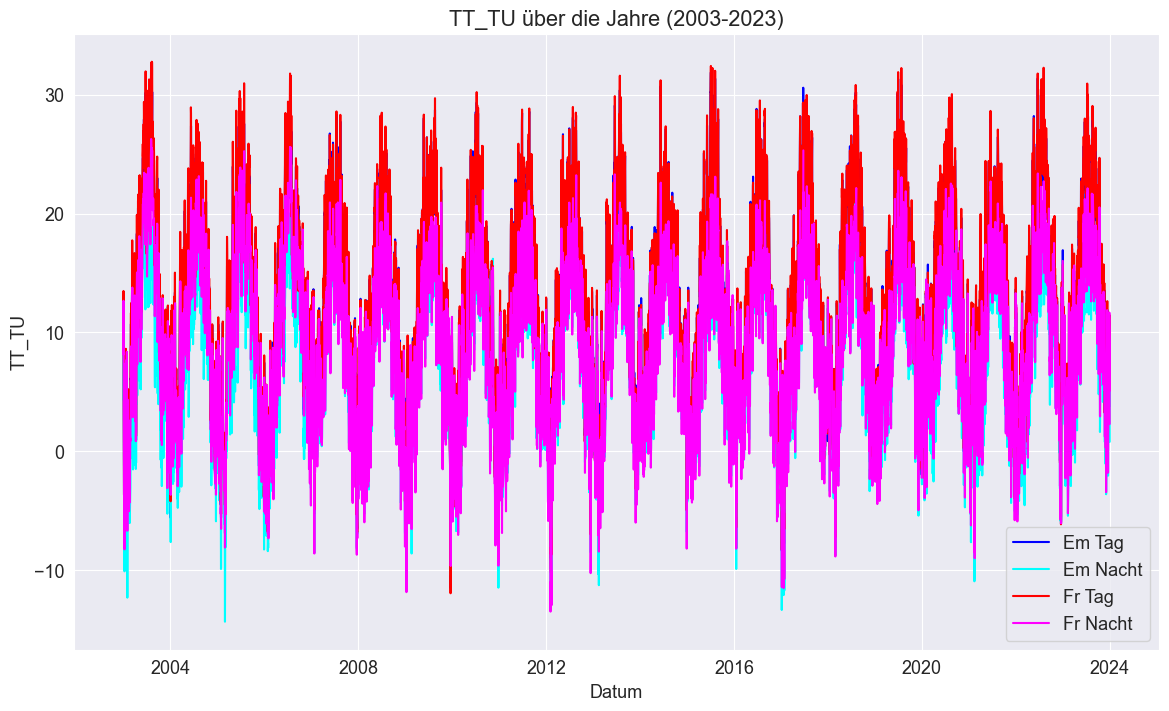

In [31]:
import matplotlib.pyplot as plt

# Plot erstellen alle zusammen
plt.figure(figsize=(14, 8))

# Plot für Em_Tag
plt.plot(Em_Tag['Datum'], Em_Tag['TT_TU'], label='Em Tag', color='blue')

# Plot für Em_Nacht
plt.plot(Em_Nacht['Datum'], Em_Nacht['TT_TU'], label='Em Nacht', color='cyan')

# Plot für Fr_Tag
plt.plot(Fr_Tag['Datum'], Fr_Tag['TT_TU'], label='Fr Tag', color='red')

# Plot für Fr_Nacht
plt.plot(Fr_Nacht['Datum'], Fr_Nacht['TT_TU'], label='Fr Nacht', color='magenta')

# Achsenbeschriftungen und Titel
plt.xlabel('Datum')
plt.ylabel('TT_TU')
plt.title('TT_TU über die Jahre (2003-2023)')
plt.legend()
plt.grid(True)

# Anzeigen des Plots
plt.show()

Der Plot zeigt die Temperaturdaten für Emmendingen und Freiburg über den Zeitraum von 2003 bis 2023, aufgeteilt in Tag- und Nachtwerte. Aufgrund der Vielzahl an überlappenden Linien und Farben ist der Plot jedoch schwer zu interpretieren und wirkt sehr unübersichtlich.

Um die These zu untersuchen, beschränken wir die Analyse auf den Sommerzeitraum, definiert als 01. Juni bis 31. August. Dazu filtern wir die vorhandenen Datensätze auf diesen Zeitraum und teilen sie in separate Plots für Tag- und Nachtwerte auf, um die Unterschiede in den Temperaturen zwischen Emmendingen und Freiburg spezifisch für den Sommer sichtbar zu machen.

In [34]:
# Datensätze nach Sommer filtern
Em_Sommer_Tag = Em_Tag[(Em_Tag['Datum'].dt.month >= 6) & (Em_Tag['Datum'].dt.month <= 8)]
Em_Sommer_Nacht = Em_Nacht[(Em_Nacht['Datum'].dt.month >= 6) & (Em_Nacht['Datum'].dt.month <= 8)]

Fr_Sommer_Tag = Fr_Tag[(Fr_Tag['Datum'].dt.month >= 6) & (Fr_Tag['Datum'].dt.month <= 8)]
Fr_Sommer_Nacht = Fr_Nacht[(Fr_Nacht['Datum'].dt.month >= 6) & (Fr_Nacht['Datum'].dt.month <= 8)]

In [35]:
# Ergebnis überprüfen
print(Em_Sommer_Tag.head())
print(Em_Sommer_Tag.tail())

         Datum Tageszeit     TT_TU
289 2003-06-01       Tag  24.57500
291 2003-06-02       Tag  24.73125
293 2003-06-03       Tag  24.05625
295 2003-06-04       Tag  25.99375
297 2003-06-05       Tag  25.37500
           Datum Tageszeit     TT_TU
15073 2023-08-27       Tag  17.41250
15075 2023-08-28       Tag  14.60625
15077 2023-08-29       Tag  16.00625
15079 2023-08-30       Tag  18.24375
15081 2023-08-31       Tag  18.16250


In [36]:
# Ergebnis überprüfen
print(Em_Sommer_Tag.head())
print(Em_Sommer_Tag.tail())

         Datum Tageszeit     TT_TU
289 2003-06-01       Tag  24.57500
291 2003-06-02       Tag  24.73125
293 2003-06-03       Tag  24.05625
295 2003-06-04       Tag  25.99375
297 2003-06-05       Tag  25.37500
           Datum Tageszeit     TT_TU
15073 2023-08-27       Tag  17.41250
15075 2023-08-28       Tag  14.60625
15077 2023-08-29       Tag  16.00625
15079 2023-08-30       Tag  18.24375
15081 2023-08-31       Tag  18.16250


Nachdem wir den Filterprozess erfolgreich abgeschlossen haben, überprüfen wir nun, wie viele _NaN_-Werte in jedem Datensatz vorhanden sind. Diese fehlenden Werte werden anschließend durch den Durchschnittswert der jeweiligen Tages- oder Nachtzeit ersetzt.

In [38]:
# Überprüfen NaN-Werte
print(Em_Sommer_Tag.isnull().sum())
print(Fr_Sommer_Tag.isnull().sum())
print(Em_Sommer_Nacht.isnull().sum())
print(Fr_Sommer_Nacht.isnull().sum())

Datum        0
Tageszeit    0
TT_TU        0
dtype: int64
Datum        0
Tageszeit    0
TT_TU        4
dtype: int64
Datum        0
Tageszeit    0
TT_TU        0
dtype: int64
Datum        0
Tageszeit    0
TT_TU        4
dtype: int64


Es zeigt sich, dass nur im Datensatz von Freiburg fehlende Werte existieren. Daher ist es notwendig, diese fehlenden Werte ausschließlich im Freiburger Datensatz durch den Durchschnittswert der jeweiligen Tages- oder Nachtzeit zu ersetzen.

In [40]:
# Sicherstellen, dass der Index im Datetime-Format vorliegt
Fr_Sommer_Tag.index = pd.to_datetime(Fr_Sommer_Tag.index)
Fr_Sommer_Nacht.index = pd.to_datetime(Fr_Sommer_Nacht.index)

# Sicherstellen, dass keine Verweise auf die Daten bestehen, sondern echte Kopien
Fr_Sommer_Tag = Fr_Sommer_Tag.copy()
Fr_Sommer_Nacht = Fr_Sommer_Nacht.copy()

# NaN-Werte durch den Durchschnitt des jeweiligen Tages ersetzen
Fr_Sommer_Tag['TT_TU'] = Fr_Sommer_Tag['TT_TU'].fillna(
    Fr_Sommer_Tag.groupby(Fr_Sommer_Tag.index)['TT_TU'].transform('mean')
)

# NaN-Werte durch den Durchschnitt der jeweiligen Nacht ersetzen
Fr_Sommer_Nacht['TT_TU'] = Fr_Sommer_Nacht['TT_TU'].fillna(
    Fr_Sommer_Nacht.groupby(Fr_Sommer_Nacht.index)['TT_TU'].transform('mean')
)

# Überprüfen, ob alle NaN-Werte ersetzt wurden
print(Fr_Sommer_Tag.isnull().sum())
print(Fr_Sommer_Nacht.isnull().sum())

Datum        0
Tageszeit    0
TT_TU        4
dtype: int64
Datum        0
Tageszeit    0
TT_TU        4
dtype: int64


Da es Tage gibt, an denen keine Werte vorliegen, ersetzen wir die _NaN_-Werte durch den monatlichen Durchschnitt für die jeweilige Tages- oder Nachtzeit. Anschließend visualisieren wir die bereinigten Daten.

In [42]:
# NaN-Werte durch den monatlichen Durchschnittswert ersetzen
Fr_Sommer_Tag['TT_TU'] = Fr_Sommer_Tag['TT_TU'].fillna(
    Fr_Sommer_Tag.groupby(Fr_Sommer_Tag.index.month)['TT_TU'].transform('mean')
)

Fr_Sommer_Nacht['TT_TU'] = Fr_Sommer_Nacht['TT_TU'].fillna(
    Fr_Sommer_Nacht.groupby(Fr_Sommer_Nacht.index.month)['TT_TU'].transform('mean')
)

# Überprüfen, ob alle NaN-Werte ersetzt wurden
print(Fr_Sommer_Tag.isnull().sum())
print(Fr_Sommer_Nacht.isnull().sum())

Datum        0
Tageszeit    0
TT_TU        0
dtype: int64
Datum        0
Tageszeit    0
TT_TU        0
dtype: int64


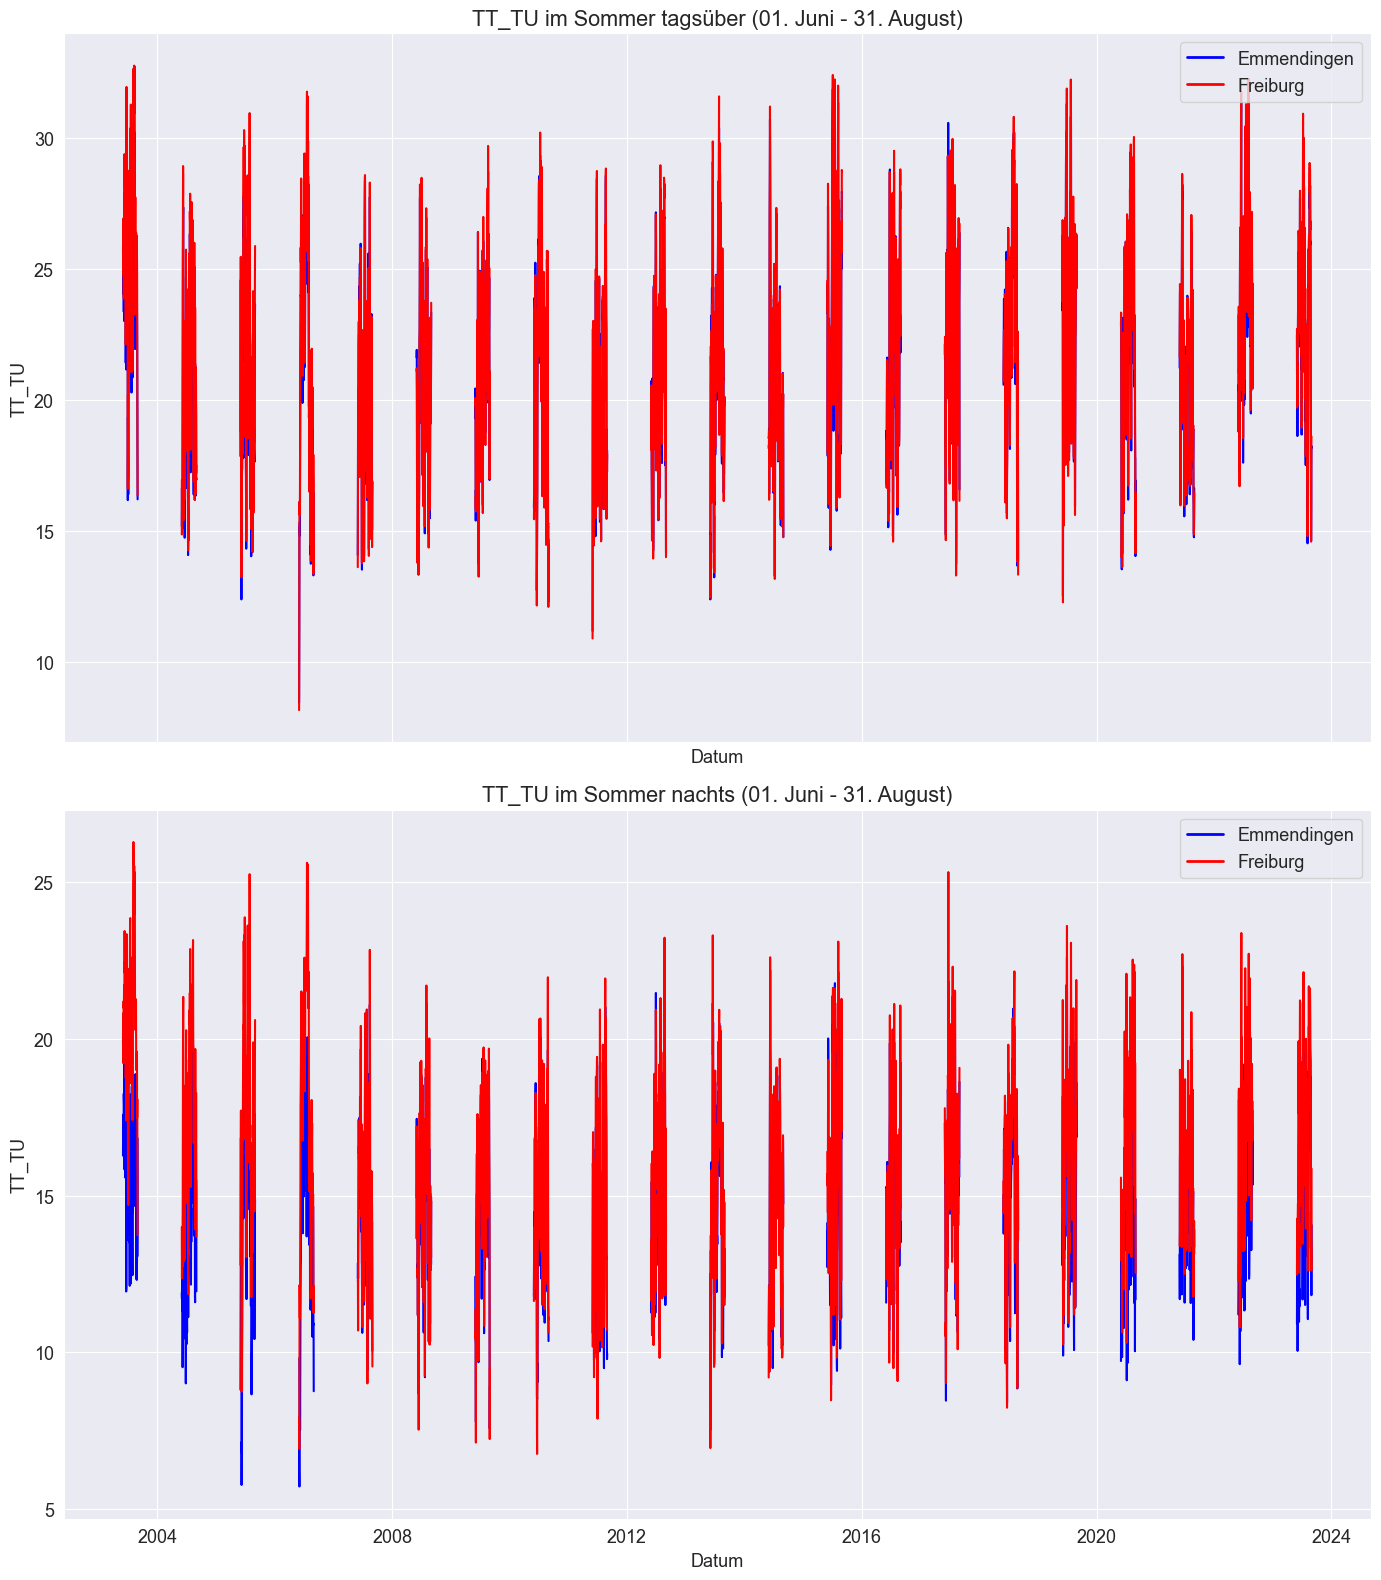

In [43]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Erstellen einer gemeinsamen Figur mit zwei Unterplots
fig, axes = plt.subplots(2, 1, figsize=(14, 16), sharex=True)

# Plot für den Tag 
for year, data in Em_Sommer_Tag.groupby(Em_Sommer_Tag['Datum'].dt.year):
    axes[0].plot(data['Datum'], data['TT_TU'], color='blue')

for year, data in Fr_Sommer_Tag.groupby(Fr_Sommer_Tag['Datum'].dt.year):
    axes[0].plot(data['Datum'], data['TT_TU'], color='red')

axes[0].set_xlabel('Datum')
axes[0].set_ylabel('TT_TU')
axes[0].set_title('TT_TU im Sommer tagsüber (01. Juni - 31. August)')
axes[0].grid(True)

# Plot für die Nacht 
for year, data in Em_Sommer_Nacht.groupby(Em_Sommer_Nacht['Datum'].dt.year):
    axes[1].plot(data['Datum'], data['TT_TU'], color='blue')

for year, data in Fr_Sommer_Nacht.groupby(Fr_Sommer_Nacht['Datum'].dt.year):
    axes[1].plot(data['Datum'], data['TT_TU'], color='red')

axes[1].set_xlabel('Datum')
axes[1].set_ylabel('TT_TU')
axes[1].set_title('TT_TU im Sommer nachts (01. Juni - 31. August)')
axes[1].grid(True)

# Manuelle Legende hinzufügen
legend_elements = [
    Line2D([0], [0], color='blue', lw=2, label='Emmendingen'),
    Line2D([0], [0], color='red', lw=2, label='Freiburg')
]

axes[0].legend(handles=legend_elements, loc='upper right')
axes[1].legend(handles=legend_elements, loc='upper right')

# Anzeigen des Plots
plt.tight_layout()
plt.show()

In diesem Doppelplot werden die Temperaturverläufe von Emmendingen (blau) und Freiburg (rot) im Sommer (01. Juni - 31. August) über die Jahre 2003 bis 2023 dargestellt. Der obere Plot zeigt die Temperaturen tagsüber, während der untere Plot die nächtlichen Temperaturen visualisiert. Beide Plots ermöglichen einen direkten Vergleich der Temperaturen zwischen den beiden Standorten im urbanen (Freiburg) und ländlichen (Emmendingen) Raum. Es ist ersichtlich, dass Freiburg tendenziell höhere Temperaturen aufweist, was ein Zeiger des urbanen Wärmeinseleffekts sein könnte.

Jetzt erstellen wir Boxplots für jeden Sommer in jedem Jahr, um die Verteilung der Temperaturen in Emmendingen und Freiburg übersichtlich darzustellen und so Unterschiede zwischen den Jahren und den beiden Standorten besser erkennen zu können.

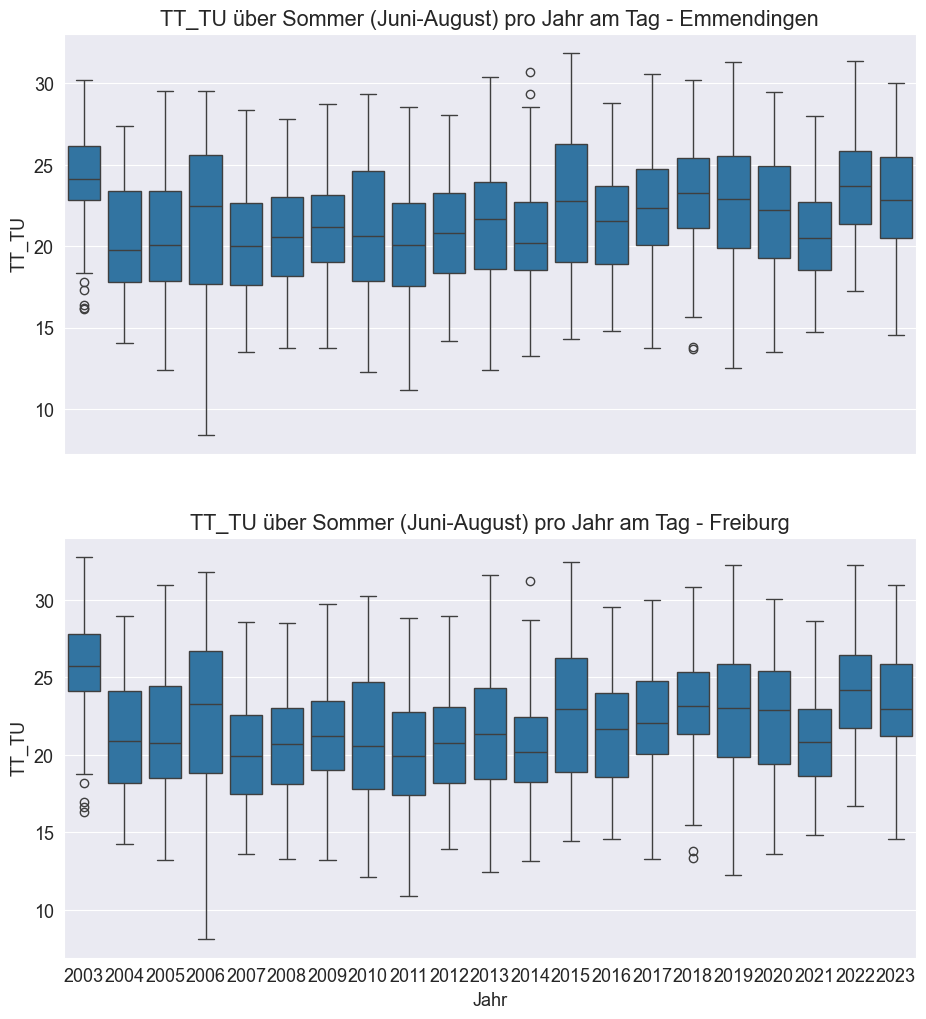

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

#Set index
Em_Sommer_Tag.set_index('Datum', inplace=True)
Fr_Sommer_Tag.set_index('Datum', inplace=True)

# Filtern der Daten für den Sommer (Juni, Juli, August)
Em_Sommer_Tag = Em_Sommer_Tag[(Em_Sommer_Tag.index.month >= 6) & (Em_Sommer_Tag.index.month <= 8)]
Fr_Sommer_Tag = Fr_Sommer_Tag[(Fr_Sommer_Tag.index.month >= 6) & (Fr_Sommer_Tag.index.month <= 8)]

# Erstellen einer neuen Spalte 'Jahr', basierend auf dem Index, um die Daten nach Jahr zu gruppieren
Em_Sommer_Tag['Jahr'] = Em_Sommer_Tag.index.year
Fr_Sommer_Tag['Jahr'] = Fr_Sommer_Tag.index.year

# Erstellen der Subplots für beide Datensätze
fig, axes = plt.subplots(2, 1, figsize=(11, 12), sharex=True)

# Boxplot für Em_Sommer_Tag erstellen
sns.boxplot(data=Em_Sommer_Tag, x='Jahr', y='TT_TU', ax=axes[0])
axes[0].set_ylabel('TT_TU')
axes[0].set_title('TT_TU über Sommer (Juni-August) pro Jahr am Tag - Emmendingen')

# Boxplot für Fr_Sommer_Tag erstellen
sns.boxplot(data=Fr_Sommer_Tag, x='Jahr', y='TT_TU', ax=axes[1])
axes[1].set_ylabel('TT_TU')
axes[1].set_title('TT_TU über Sommer (Juni-August) pro Jahr am Tag - Freiburg')

# Anzeigen des Plots
plt.show()

Die Boxplots geben bereits einen guten Überblick über die Tagestemperaturen im Sommer. Als nächstes werden wir denselben Vergleich für die Nachttemperaturen durchführen, um auch hier mögliche Unterschiede zu erkennen.

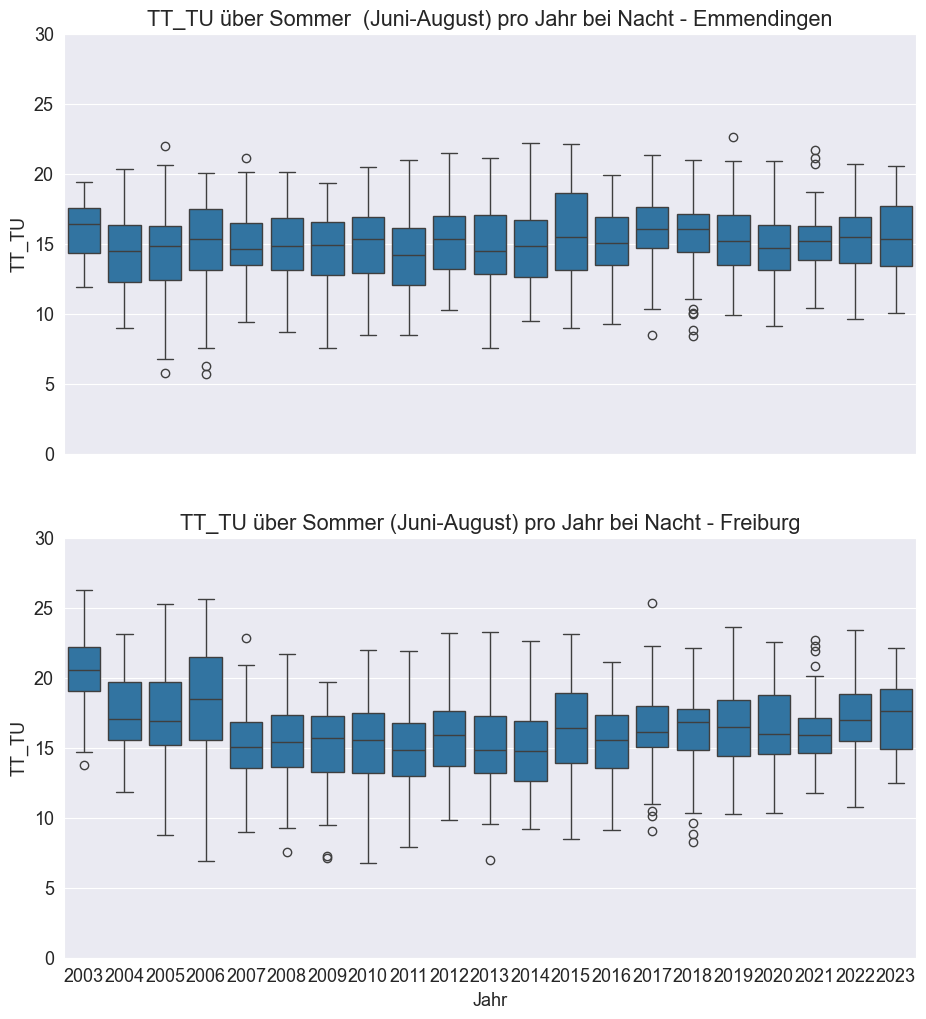

In [48]:
# Set index
Em_Sommer_Nacht.set_index('Datum', inplace=True)
Fr_Sommer_Nacht.set_index('Datum', inplace=True)

# Filtern der Daten für den Sommer (Juni, Juli, August)
Em_Sommer_Nacht = Em_Sommer_Nacht[(Em_Sommer_Nacht.index.month >= 6) & (Em_Sommer_Nacht.index.month <= 8)]
Fr_Sommer_Nacht = Fr_Sommer_Nacht[(Fr_Sommer_Nacht.index.month >= 6) & (Fr_Sommer_Nacht.index.month <= 8)]

# Erstellen einer neuen Spalte 'Jahr', basierend auf dem Index, um die Daten nach Jahr zu gruppieren
Em_Sommer_Nacht['Jahr'] = Em_Sommer_Nacht.index.year
Fr_Sommer_Nacht['Jahr'] = Fr_Sommer_Nacht.index.year

# Erstellen der Subplots für beide Datensätze
fig, axes = plt.subplots(2, 1, figsize=(11, 12), sharex=True)

# Y-Achsenbereich festlegen
y_min, y_max = 0, 30

# Boxplot für Em_Sommer_Nacht erstellen
sns.boxplot(data=Em_Sommer_Nacht, x='Jahr', y='TT_TU', ax=axes[0])
axes[0].set_ylabel('TT_TU')
axes[0].set_title('TT_TU über Sommer  (Juni-August) pro Jahr bei Nacht - Emmendingen')
axes[0].set_ylim(y_min, y_max)

# Boxplot für Fr_Sommer_Nacht erstellen
sns.boxplot(data=Fr_Sommer_Nacht, x='Jahr', y='TT_TU', ax=axes[1])
axes[1].set_ylabel('TT_TU')
axes[1].set_title('TT_TU über Sommer (Juni-August) pro Jahr bei Nacht - Freiburg')
axes[1].set_ylim(y_min, y_max)

# Anzeigen des Plots
plt.show()

Die Boxplots zeigen die Nachttemperaturen im Sommer für jedes Jahr sowohl in Emmendingen als auch in Freiburg. Hier lässt sich erkennen, wie sich die Temperaturverteilungen über die Jahre entwickelt haben. Wieder sehen wir, dass die Temperaturen in Freiburg höher sind, was den urbanen Wärmeinseleffekt, insbesondere bei Nacht, verdeutlicht. 

Aus der optischen Analyse der bisherigen Plots könnten wir vermuten, dass die Temperaturen (TT_TU) in Freiburg im Durchschnitt etwas höher sind als in Emmendingen. Besonders in der Nacht scheinen die Unterschiede größer zu sein. Um diese Vermutung genauer zu untersuchen, erstellen wir zwei neue Datensätze: Unterschied_Tag und Unterschied_Nacht. Diese Datensätze enthalten die täglichen Temperaturdifferenzen, berechnet als Durchschnittstemperaturen von Freiburg abgezogen von den Durchschnittstemperaturen von Emmendingen.

Um die Daten übersichtlicher darzustellen, zeigen wir diese Differenzen jedoch nicht für jeden einzelnen Tag, sondern mitteln sie zu wöchentlichen Temperaturunterschieden. Zusätzlich fügen wir eine Linie hinzu, die die durchschnittlichen Temperaturunterschiede für jeden Sommer (Juni bis August) darstellt. Diese Darstellung ermöglicht es uns, sowohl die wöchentlichen Schwankungen als auch die langfristigen Trends in den Temperaturunterschieden zwischen den beiden Standorten zu visualisieren.

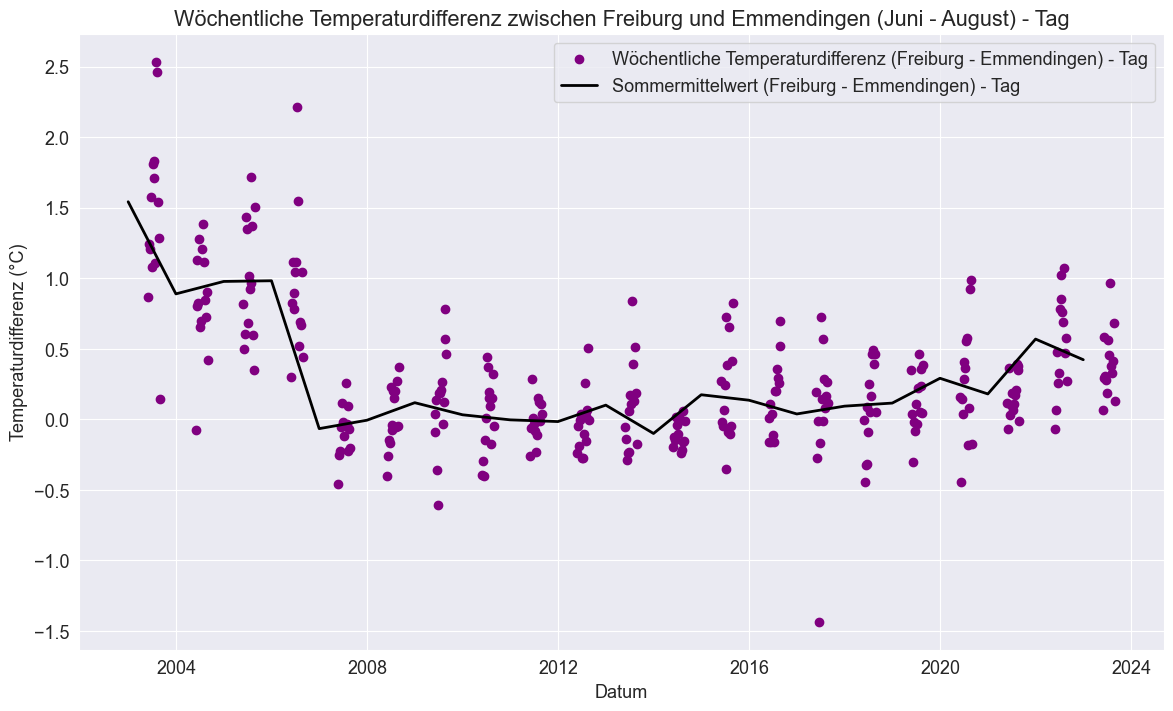

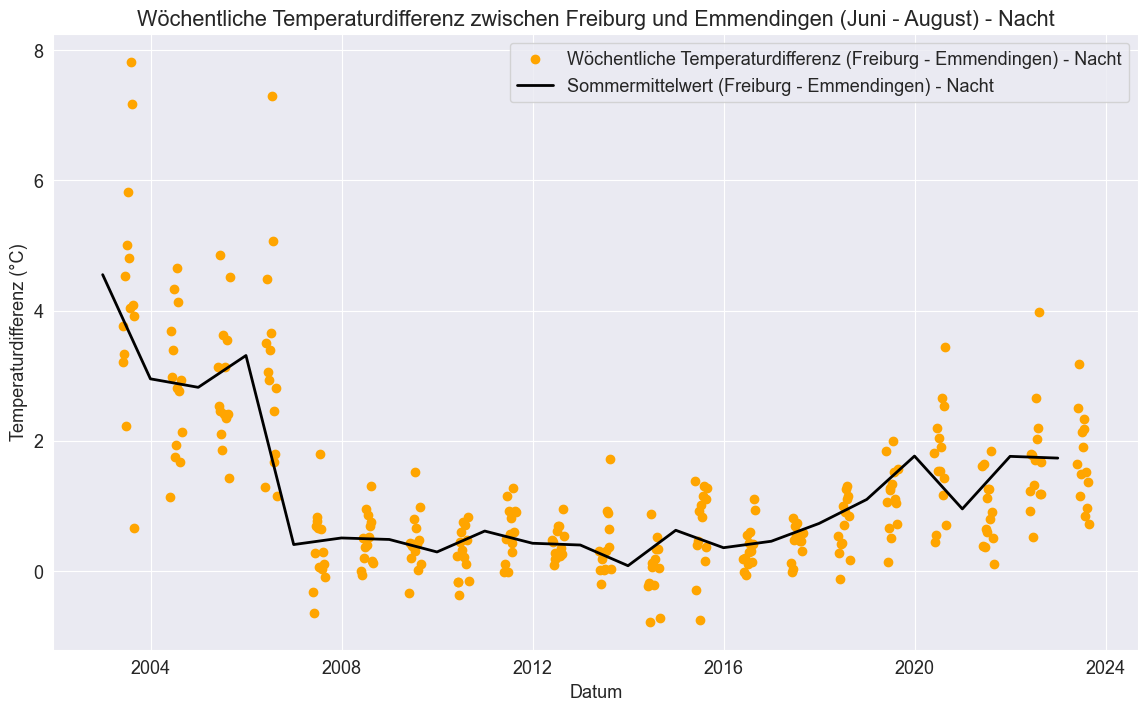

In [51]:
# Erstellen der Datensätze Unterschied_Tag und Unterschied_Nacht
Unterschied_Tag = pd.DataFrame()
Unterschied_Nacht = pd.DataFrame()

# Berechnung der täglichen Temperaturunterschiede
Unterschied_Tag['Temp_Diff'] = Fr_Sommer_Tag['TT_TU'] - Em_Sommer_Tag['TT_TU']
Unterschied_Nacht['Temp_Diff'] = Fr_Sommer_Nacht['TT_TU'] - Em_Sommer_Nacht['TT_TU']

# Berechnung des wöchentlichen Durchschnitts
Woche_Tag = Unterschied_Tag.resample('W', label='left', closed='left').mean()
Woche_Nacht = Unterschied_Nacht.resample('W', label='left', closed='left').mean()

# Berechnung des jährlichen Sommer-Mittelwerts
Sommer_Mean_Tag = Unterschied_Tag.resample('YE', label='left', closed='left').mean()
Sommer_Mean_Nacht = Unterschied_Nacht.resample('YE', label='left', closed='left').mean()

# Scatterplot für die wöchentliche Temperaturdifferenz am Tag
plt.figure(figsize=(14, 8))
plt.scatter(Woche_Tag.index, Woche_Tag['Temp_Diff'], label='Wöchentliche Temperaturdifferenz (Freiburg - Emmendingen) - Tag', color='purple')
plt.plot(Sommer_Mean_Tag.index, Sommer_Mean_Tag['Temp_Diff'], label='Sommermittelwert (Freiburg - Emmendingen) - Tag', color='black', linewidth=2)

# Achsenbeschriftungen und Titel für Tag-Plot
plt.xlabel('Datum')
plt.ylabel('Temperaturdifferenz (°C)')
plt.title('Wöchentliche Temperaturdifferenz zwischen Freiburg und Emmendingen (Juni - August) - Tag')
plt.grid(True)
plt.legend()

# Anzeigen des Tag-Plots
plt.show()

# Scatterplot für die wöchentliche Temperaturdifferenz in der Nacht
plt.figure(figsize=(14, 8))
plt.scatter(Woche_Nacht.index, Woche_Nacht['Temp_Diff'], label='Wöchentliche Temperaturdifferenz (Freiburg - Emmendingen) - Nacht', color='orange')
plt.plot(Sommer_Mean_Nacht.index, Sommer_Mean_Nacht['Temp_Diff'], label='Sommermittelwert (Freiburg - Emmendingen) - Nacht', color='black', linewidth=2)

# Achsenbeschriftungen und Titel für Nacht-Plot
plt.xlabel('Datum')
plt.ylabel('Temperaturdifferenz (°C)')
plt.title('Wöchentliche Temperaturdifferenz zwischen Freiburg und Emmendingen (Juni - August) - Nacht')
plt.grid(True)
plt.legend()

# Anzeigen des Nacht-Plots
plt.show()

Hier wird es noch deutlicher: Die Temperaturdifferenz ist besonders zu Beginn der Datenreihe größer, also ein deutliche positive Differenz. Besonders in der Nacht zeigt sich, dass Freiburg konsistent wärmer ist als Emmendingen, was unsere vorherige Beobachtung stützt. Daher möchten wir nun unsere Hypothese überprüfen, dass es im Sommer in Freiburg (urban) durchschnittlich wärmer ist als in Emmendingen (rural). Auch unsere Vermutung, dass dieser Unterschied in der Nacht größer ist, scheint sich durch die visuelle Analyse zu bestätigen. Um diese Hypothesen statistisch zu überprüfen, werden wir zunächst mit dem Shapiro-Wilk-Test die Normalverteilung unserer Daten prüfen.

In [53]:
from scipy.stats import shapiro

# Shapiro-Wilk-Test für Tag-Daten
stat, p_value = shapiro(Fr_Sommer_Tag['TT_TU'])
print('Shapiro-Wilk-Test für Freiburg Tag:')
print(f'Statistik: {stat}, p-Wert: {p_value}')

stat, p_value = shapiro(Em_Sommer_Tag['TT_TU'])
print('Shapiro-Wilk-Test für Emmendingen Tag:')
print(f'Statistik: {stat}, p-Wert: {p_value}')

# Shapiro-Wilk-Test für Nacht-Daten
stat, p_value = shapiro(Fr_Sommer_Nacht['TT_TU'])
print('Shapiro-Wilk-Test für Freiburg Nacht:')
print(f'Statistik: {stat}, p-Wert: {p_value}')

stat, p_value = shapiro(Em_Sommer_Nacht['TT_TU'])
print('Shapiro-Wilk-Test für Emmendingen Nacht:')
print(f'Statistik: {stat}, p-Wert: {p_value}')

Shapiro-Wilk-Test für Freiburg Tag:
Statistik: 0.9957375058741371, p-Wert: 2.7088668495597212e-05
Shapiro-Wilk-Test für Emmendingen Tag:
Statistik: 0.9959906943713426, p-Wert: 5.195818328656741e-05
Shapiro-Wilk-Test für Freiburg Nacht:
Statistik: 0.9987073452626066, p-Wert: 0.1573103012357575
Shapiro-Wilk-Test für Emmendingen Nacht:
Statistik: 0.997012933460301, p-Wert: 0.0008636350852162805


Die Ergebnisse des Shapiro-Wilk-Tests zeigen, dass die **Tag-Daten für Freiburg und Emmendingen (p-Werte < 0,05) nicht normalverteilt** sind. Bei den **Nacht-Daten ist nur Freiburg (p-Wert = 0,157) möglicherweise normalverteilt**, während Emmendingen (p-Wert < 0,05) nicht normalverteilt ist. Für die Tag-Daten: Da beide Datensätze nicht normalverteilt sind, verwenden wir den Mann-Whitney-U-Test für eine einseitige Hypothese, um zu überprüfen, ob die Temperaturen in Freiburg signifikant höher sind als in Emmendingen.
Für die Nacht-Daten: Auch hier wird aufgrund der Nicht-Normalverteilung der  Emmendinger Daten der Mann-Whitney-U-Test angewendet, um die Hypothese zu überprüfen.

In [55]:
from scipy.stats import mannwhitneyu

# Einseitiger Mann-Whitney-U-Test für Tag-Daten (H1: Freiburg > Emmendingen)
u_stat, p_value = mannwhitneyu(Fr_Sommer_Tag['TT_TU'], Em_Sommer_Tag['TT_TU'], alternative='greater')
print('Einseitiger Mann-Whitney-U-Test für Tag:')
print(f'U-Statistik: {u_stat}, p-Wert: {p_value}')

# Einseitiger Mann-Whitney-U-Test für Nacht-Daten (H1: Freiburg > Emmendingen)
u_stat, p_value = mannwhitneyu(Fr_Sommer_Nacht['TT_TU'], Em_Sommer_Nacht['TT_TU'], alternative='greater')
print('Einseitiger Mann-Whitney-U-Test für Nacht:')
print(f'U-Statistik: {u_stat}, p-Wert: {p_value}')

Einseitiger Mann-Whitney-U-Test für Tag:
U-Statistik: 1936570.5, p-Wert: 0.02136680707121466
Einseitiger Mann-Whitney-U-Test für Nacht:
U-Statistik: 2284980.0, p-Wert: 7.179144552898601e-34


Die Ergebnisse zeigen:

Für die **Tag-Daten** ergibt der **p-Wert von etwa 0.021**, dass es einen **signifikanten Unterschied** zwischen den Temperaturen in Freiburg und Emmendingen gibt. Da der p-Wert kleiner als 0,05 ist, können wir die Nullhypothese ablehnen und annehmen, dass die Temperaturen in Freiburg am Tag signifikant höher sind als in Emmendingen.

Für die **Nacht-Daten** ist der **p-Wert extrem klein** (etwa 7.17e-34), was ebenfalls auf einen **hoch signifikanten Unterschied** zwischen den Temperaturen in Freiburg und Emmendingen in der Nacht hinweist. Dies bestätigt, dass die Temperaturunterschiede nachts noch deutlicher ausgeprägt sind.

Diese Ergebnisse unterstützen unsere Hypothese, dass Freiburg im Sommer im Durchschnitt wärmer ist als Emmendingen, insbesondere in der Nacht.

### Conclusion

Unsere Untersuchung bestätigt die Hypothese, dass die Temperaturen im Sommer in Freiburg (als urbaner Raum) im Durchschnitt höher sind als in Emmendingen (als ländlicher Raum). Dies gilt sowohl für die Tages- als auch für die Nachtwerte, wobei die Unterschiede in der Nacht stärker sind. Durch die statistischen Analysen, einschließlich des Mann-Whitney-U-Tests, konnten wir signifikante Temperaturunterschiede zwischen den beiden Standorten nachweisen. Die städtische Umgebung Freiburgs zeigt eine stärkere Erwärmung, was möglicherweise auf den urbanen Wärmeinseleffekt zurückzuführen ist.

### Quellen
1. Matzarakis, A., Muthers, S., & Graw, K. (2020). Thermische Belastung von Bewohnern in Städten bei Hitzewellen am Beispiel von Freiburg (Breisgau). Bundesgesundheitsblatt-Gesundheitsforschung-Gesundheitsschutz, 63(8), 1004-1012. 
URL: https://scholar.archive.org/work/7qodjod2fjbllnfxvklverl4ou/access/wayback/https://link.springer.com/content/pdf/10.1007/s00103-020-03181-0.pdf (12.08.24)
2. Einwohnerzahl Emmendingen-Mundingen
URL: https://www.emmendingen.de/stadt-info/stadt-emmendingen/ortschaften-stadtteile (12.08.24)
3. Einwohnerzahl Freiburg
URL: https://www.freiburg.de/pb/207904.html (12.08.24)
4. meteorologischer Sommer, DWD
URL: https://www.dwd.de/DE/service/lexikon/Functions/glossar.html?lv3=102524&lv2=102248 (12.08.24)